In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
import cv2
import os



import shutil

In [2]:
df = pd.read_csv('raw_data/ISIC_2019_Training_Metadata.csv')


In [3]:
df


,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [4]:
df.drop(columns=['lesion_id'], inplace = True)


In [5]:
df.columns


Index(['image', 'age_approx', 'anatom_site_general', 'sex'], dtype='object')

In [6]:
# Counting the number of NaN for each column

df.isnull().sum().sort_values(ascending=False)

anatom_site_general    2631
age_approx              437
sex                     384
image                     0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False)/len(df)

anatom_site_general    0.103865
age_approx             0.017252
sex                    0.015159
image                  0.000000
dtype: float64

In [8]:

df.anatom_site_general.replace(np.nan, "unknown", inplace=True) #Replace NaN by "Unknown"
df.anatom_site_general.value_counts()


anterior torso     6915
lower extremity    4990
head/neck          4587
upper extremity    2910
posterior torso    2787
unknown            2631
palms/soles         398
oral/genital         59
lateral torso        54
Name: anatom_site_general, dtype: int64

In [9]:
#Replace missing age_approx values with mean

df.age_approx.replace(np.nan, df.age_approx.mean(), inplace=True)

In [10]:
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])


In [11]:
df.isnull().sum().sort_values(ascending=False)/len(df)


image                  0.0
age_approx             0.0
anatom_site_general    0.0
sex                    0.0
dtype: float64

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets
print(f"The unique values for 'sex' are {df.sex.unique()}")
# Instantiate the OneHotEncoder
ohe_binary = OneHotEncoder(sparse = False)
# Fit encoder
ohe_binary.fit(df[['sex']])
# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe_binary.categories_}")

The unique values for 'sex' are ['female' 'male']
The categories detected by the OneHotEncoder are [array(['female', 'male'], dtype=object)]


In [13]:
# Display the generated names
print(f"The column names for the encoded values are {ohe_binary.get_feature_names_out()}")
# Transform the current "sex" column
df[ohe_binary.get_feature_names_out()] = ohe_binary.transform(df[['sex']])
# Drop the column "Street" which has been encoded

df.drop(columns = ["sex"], inplace = True)
# Show the data
df.head()

The column names for the encoded values are ['sex_female' 'sex_male']


,image,age_approx,anatom_site_general,sex_female,sex_male
0,ISIC_0000000,55.0,anterior torso,1.0,0.0
1,ISIC_0000001,30.0,anterior torso,1.0,0.0
2,ISIC_0000002,60.0,upper extremity,1.0,0.0
3,ISIC_0000003,30.0,upper extremity,0.0,1.0
4,ISIC_0000004,80.0,posterior torso,0.0,1.0


In [14]:
from sklearn.preprocessing import OneHotEncoder

import numpy as np
# Check unique values for anatom
print(f"The unique values for 'anatom' are {df.anatom_site_general.unique()}")
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False)
# Fit encoder
ohe.fit(df[['anatom_site_general']])
# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The unique values for 'anatom' are ['anterior torso' 'upper extremity' 'posterior torso' 'lower extremity'
 'unknown' 'lateral torso' 'head/neck' 'palms/soles' 'oral/genital']
The categories detected by the OneHotEncoder are [array(['anterior torso', 'head/neck', 'lateral torso', 'lower extremity',
       'oral/genital', 'palms/soles', 'posterior torso', 'unknown',
       'upper extremity'], dtype=object)]


In [15]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")
# Transform the current "anatom" column
df[ohe.get_feature_names_out()] = ohe.transform(df[['anatom_site_general']])
# Drop the column "anatom" which has been encoded
df.drop(columns = ["anatom_site_general"], inplace = True)
# Show the dataset
df.head(3)

The column names for the encoded values are ['anatom_site_general_anterior torso' 'anatom_site_general_head/neck'
 'anatom_site_general_lateral torso' 'anatom_site_general_lower extremity'
 'anatom_site_general_oral/genital' 'anatom_site_general_palms/soles'
 'anatom_site_general_posterior torso' 'anatom_site_general_unknown'
 'anatom_site_general_upper extremity']


,image,age_approx,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_unknown,anatom_site_general_upper extremity
0,ISIC_0000000,55.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


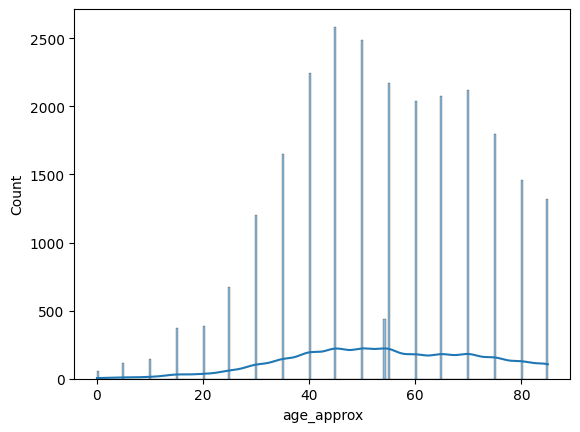

In [16]:
import seaborn as sns
sns.histplot(df['age_approx'], bins=200,kde = True);

<AxesSubplot:xlabel='age_approx'>

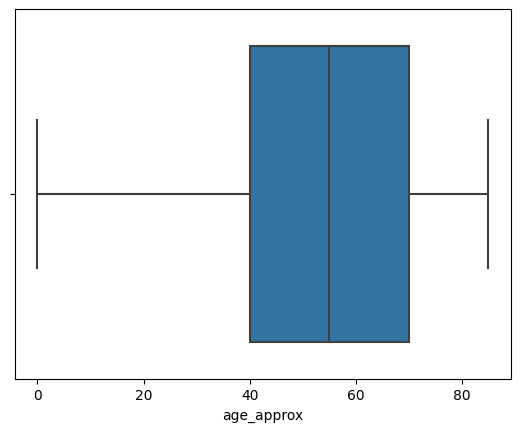

In [17]:
sns.boxplot(data=df, x='age_approx')

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Step 0 - Instanciate  Scaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(df[['age_approx']])
# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house
df['age_approx'] = minmax_scaler.transform(df[['age_approx']])
df.head()

,image,age_approx,sex_female,sex_male,anatom_site_general_anterior torso,anatom_site_general_head/neck,anatom_site_general_lateral torso,anatom_site_general_lower extremity,anatom_site_general_oral/genital,anatom_site_general_palms/soles,anatom_site_general_posterior torso,anatom_site_general_unknown,anatom_site_general_upper extremity
0,ISIC_0000000,0.647059,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.352941,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,0.705882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ISIC_0000003,0.352941,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ISIC_0000004,0.941176,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
def return_features(path):
    id_image=path.split('/')[-1]
    
    id_image=id_image[:-4]
    
    ligne = df.loc[df['image'] == id_image]
    #age = ligne['age_approx'].values[1]
    
    
    features = ligne.drop('image', axis=1)
    
    features_array = np.array(features.values.flatten(), dtype=float)
    return features_array



In [26]:
return_features('coucou/ISIC_0000000.jpg')




array([0.64705882, 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

'va'